# Data Scientist Associate Practical Exam Submission



## Data Validation

The dataset contains **1500 rows** and **8 columns** with missing values before cleaning. I have validated all the columns against the criteria in the dataset table:

1. **owned**: Same as description without missing values, nominal(1 or 0).
2. **make_model**: Same as description without missing values, 6 uniques values.
3. **review_month**: Some rows were recorded along with dates in the format "XX-Month", These strings were scliced to match the description to show only month in english short format.
4. **web_browser**: 150 missing values were found, replaced them with "unknown"
5. **reviewer_age**: one unexpected value string "-", was replaced with a null value and the datatype of the column was changed from object to int64, then the null value was imputed by the average of the column, integer values range from 16 to 50 as mentioned in the description.
6. **primary_use**: Same as description without missing values, either Commuting or Leisure.
7. **value_for_money**: Same a description without missing values, but the values were of string format "x/10", sliced the strings to remove the last three characters and changed the datatype from object to int64. The values range from 1 to 10.
8. **overall_rating**: same as decription without missing values, continuous values ranging from 1 to 25.

After the data validation, the dataset has the same number of rows and columns.


In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import numpy as np
import plotly.graph_objects as go 
import plotly.express as px
df = pd.read_csv('electric_bike_ratings_2212.csv')
df.dtypes

owned                int64
make_model          object
review_month        object
web_browser         object
reviewer_age        object
primary_use         object
value_for_money     object
overall_rating     float64
dtype: object

In [94]:
df

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5/10,18.62
1,0,Nielah-Keetra,Jun,NaN,24,Commuting,4/10,15.55
2,0,Lunna-Keetra,23-Oct,Chrome,28,Commuting,5/10,12.76
3,1,Hoang-Keetra,07-Nov,IE,41,Leisure,5/10,17.07
4,1,Lunna-Keetra,16-Sep,Chrome,33,Leisure,5/10,12.29
...,...,...,...,...,...,...,...,...
1495,1,Nielah-Eyden,18-May,Chrome,-,Leisure,6/10,18.76
1496,1,Nielah-Eyden,11-Mar,NaN,39,Commuting,5/10,18.56
1497,1,Nielah-Eyden,10-Nov,Chrome,21,Commuting,8/10,20.22
1498,0,Nielah-Eyden,Nov,Safari,45,Commuting,3/10,18.51


In [95]:
for col in df.columns:
    miss = df[col].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(col,miss))
    else:
        print("{} has NO missing value!".format(col))

owned has NO missing value!
make_model has NO missing value!
review_month has NO missing value!
web_browser has 150 missing value(s)
reviewer_age has NO missing value!
primary_use has NO missing value!
value_for_money has NO missing value!
overall_rating has NO missing value!


In [96]:
df["value_for_money"] = df["value_for_money"].str[:-3]
df["reviewer_age"] = df["reviewer_age"].replace('-','0')
df["reviewer_age"] = df["reviewer_age"].astype('int64')
df["value_for_money"] = df["value_for_money"].astype('int64')
df["review_month"] = df["review_month"].str[-3:]
df["web_browser"] = df["web_browser"].fillna("unknown")
df["reviewer_age"] = df["reviewer_age"].replace(0,np.nan)
df["reviewer_age"] = df["reviewer_age"].replace(np.nan,df["reviewer_age"].mean())

In [97]:
df.nunique()

owned                2
make_model           6
review_month        12
web_browser          7
reviewer_age        36
primary_use          2
value_for_money     10
overall_rating     583
dtype: int64

## Visualization that shows how many reviews were from owners and how many were not owners


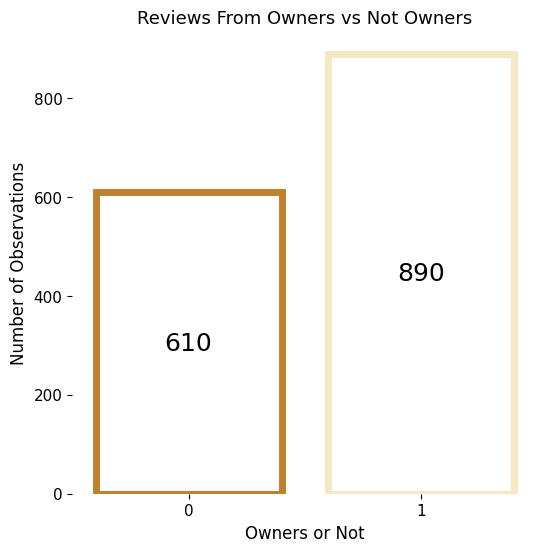

In [98]:
f, ax = plt.subplots(figsize=(6,6))
sns.countplot(x ='owned', data = df,color="salmon", facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("BrBG", 4))
ax.grid(False)
plt.xlabel('Owners or Not', fontsize=12)
plt.ylabel('Number of Observations', fontsize=12)
plt.title('Reviews From Owners vs Not Owners', fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=11)
sns.despine(left=True, bottom=True)
ax.bar_label(ax.containers[0], label_type='center',fontsize=18)
plt.show()

The most number of reviews,i.e. 890 are from the owners, which is approximately 59.3% of the total observations.

This is not a perfectly balanced dataset, with a 3:2 ratio between owners and not owners.

## Visualization that shows the distribution of the overall ratings

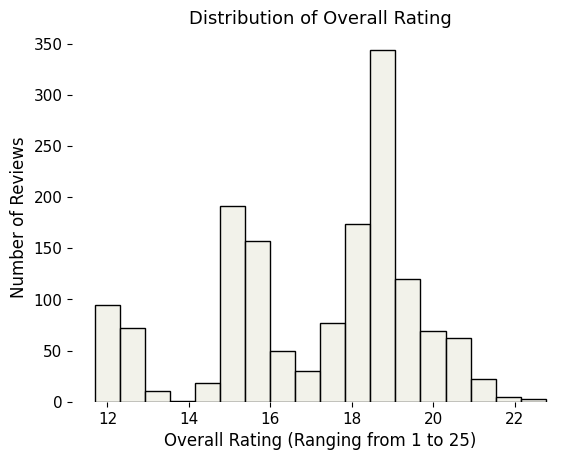

In [99]:
# Histogram for distribution of time to close
sns.histplot(data=df, x="overall_rating",color="#eeeee4")
ax.grid(False)
plt.xlabel('Overall Rating (Ranging from 1 to 25)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
ax.set_xticks(range(0,10,1))
ax.set_yticks(range(0,20,2))
plt.title('Distribution of Overall Rating', fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=11)
sns.despine(left=True, bottom=True)

A histogram is used as it is known to be the best to visualise distribution of a variable. According to the above histogram, the Overall Rating looks to be a MultiModal distribution, the reason being that it has more than two distinct peaks.

## Visualizing the relationship between ownership and overall rating using a line chart

In [100]:

# plotting Average time to close by country using a boxplot

y = df['overall_rating']
config = {'displaylogo': False, 'displayModeBar': False}
fig = go.Figure()
fig.add_trace(go.Box(
    x=df['owned'],
    y=y,line=dict(color='#638677'), fillcolor= "#b6dcd7",boxmean = True 
))
fig.update_layout(
    yaxis=dict(title='Overall Rating (Ranging from 1 to 25)', zeroline=True),
    xaxis=dict(title='Ownership', zeroline=True),
    boxmode='group',
    width =  950,
    height = 950,
    margin_pad = 1,
    hoverlabel_align="left",
	paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='white',
    hoverlabel=dict(
        bgcolor = "white",
        font = dict(
            color = "Dark Grey",
            family = "Courier New",
            )    
    )

    
    
)
fig.update_traces(orientation='v')
fig.show(config=config)


From the above boxplots, we can observe that overall rating is affected by the ownership, which can be cleraly seen that the reviews of owners have a greater median value of overall rating than that of the overall rating from the non owners. we are considering median as a parameter here because the overall rating given by owners has outliers, which make the mean skewed.

## The business wants to predict whether a review came from an owner or not using the data provided. This is clearly a classification tyoe of machine. learning problem where we are supposed to predict the categorical variable to classify if the review was given by a owner or not.

## Fitting a Baseline model
A baseline model is essentially a simple model that serves as a reference in a machine learning project. Its primary function is to contextualise the outputs of trained models.Baseline models are often simple and have low predictive potential. Nonetheless, their participation is required for a variety of reasons.

I am here choosing a Logistic regression model as the baseline model as we are dealing with a classification problem here

In [101]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 

In [102]:
df_final = df.drop(columns='owned')
X = pd.get_dummies(df_final, columns=['make_model','review_month','primary_use','web_browser'])
y = df['owned']

In [103]:
# Splitting the dataset using train_test_split, keeping the test size as 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [104]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_log =logreg.predict(X_test)

## Fitting a Comparision Model
I am choosing a Random forest classifier for comparision because Random forest also employs the bagging technique, which allows each tree to be trained on a random sampling of the original dataset and gets the majority vote from the trees. When compared to decision trees, it offers stronger generalisation.

In [105]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)
y_pred_random = random_forest.predict(X_test)

## Logistic Regression VS Random Tree Classifier


In [106]:
print("Logistic Regression")
print(classification_report(y_test, y_pred_log))
print("Random Tree Classifier")
print(classification_report(y_test, y_pred_random))

Logistic Regression
              precision    recall  f1-score   support

           0       0.71      0.61      0.66       179
           1       0.76      0.84      0.80       271

    accuracy                           0.75       450
   macro avg       0.74      0.72      0.73       450
weighted avg       0.74      0.75      0.74       450

Random Tree Classifier
              precision    recall  f1-score   support

           0       0.67      0.60      0.63       179
           1       0.75      0.80      0.78       271

    accuracy                           0.72       450
   macro avg       0.71      0.70      0.70       450
weighted avg       0.72      0.72      0.72       450



## Model Evaluation

Accuracy is chosen to evaluate the model because it is simple to interpret. Accuracy is concerned with the correct prediction of all predictions.

The accuracy of the Logistic Regression model and the Random Forest model is 0.75 and 0.72, respectively, indicating that the Logistic Regression model predicts slightly more accurately whether a reviewer is a owner or not.


## Conclusion

Based on this statistic, The accuracy of logistic regression model suggests that the number of reviews calssified correctly as true negatives (TN) or true positives(TP) is aproximately 70% of all the predicted values, we may conclude that the Logistic Regression model has a slightly greater likelihood of making the accurate forecast.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam